In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
import os
import numpy as np

In [3]:
np.random.seed(42)

# Zad
Wykonaj algorytm k-means na danych MNIST.

In [4]:
from sklearn.datasets import fetch_mldata
from sklearn.linear_model import LogisticRegression

mnist = fetch_mldata('MNIST original')
X = mnist.data.astype('float64')
y = mnist.target
print(X.shape, " ", y.shape)



(70000, 784)   (70000,)


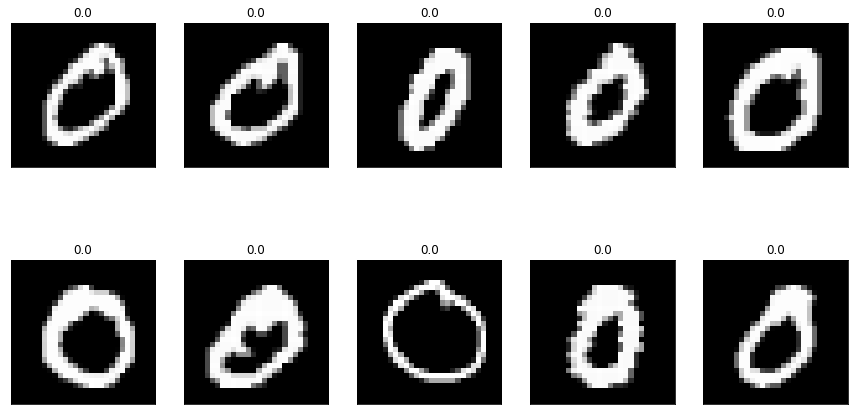

In [5]:
fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(y, X, axes.ravel()):
    ax.imshow(image.reshape(28, 28), cmap=plt.cm.gist_gray)
    ax.set_title(target)
plt.show() 

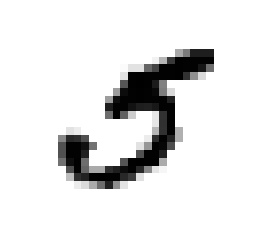

In [6]:
import matplotlib
import matplotlib.pyplot as plt
some_digit = X[36000]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [7]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

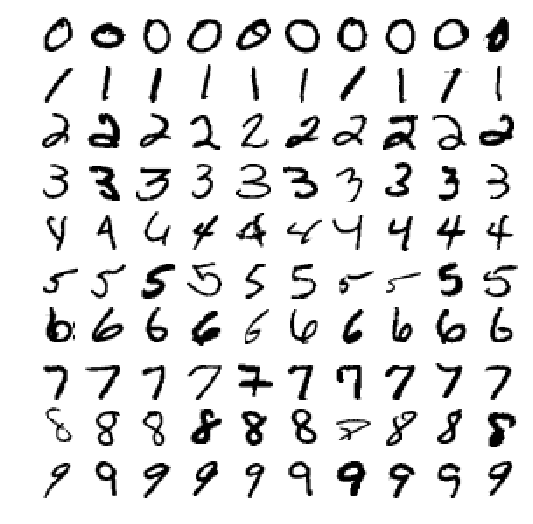

In [8]:
plt.figure(figsize=(9,9))
example_images = np.r_[X[:12000:600], X[13000:30600:600], X[30600:60000:590]]
plot_digits(example_images, images_per_row=10)
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
seed=123

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

print(X_train.shape)
print(y_train.shape)

(56000, 784)
(56000,)


# Zad
Jeżeli nie zredukujesz wymiarów to będzie się liczyć bardzo długo (odradzam sprawdzanie).

In [10]:
from sklearn.cluster import KMeans
# extract clusters with k-Means
km = KMeans(n_clusters=10, random_state=0)
labels_km = km.fit_predict(X_train)

In [14]:
from sklearn import metrics
print(metrics.adjusted_rand_score(y_train, labels_km))

0.3654834257814589


# Zad
Wyznacz optymalną ilość współrzędnych w PCA


In [1]:
from sklearn.decomposition import PCA


# Zad
Zredukuj wymiar do **n_components=10** i wykonaj k-means.

Jaki uzyskałeś **adjusted_rand_score**

In [22]:
# scoring on the scaled test set
print("Scaled test set Adjusted Rand Score: {:.2f}".format( metrics.adjusted_rand_score(labels_km, y_train)) )

Scaled test set Adjusted Rand Score: 0.34


# Zad
Wykonaj analogiczne zadanie za pomoca: 

```python
from sklearn.pipeline import Pipeline
```

# Zad.

Narysuj zależność ilości wymiarów i miary Adjusted Rand Score dla

**
n_components = 2,...,100
**

In [2]:
from sklearn.pipeline import Pipeline



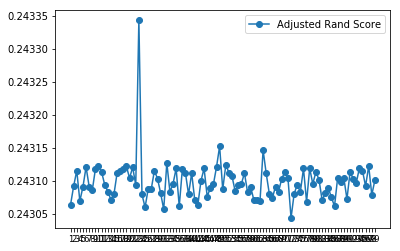

In [24]:
t=range(1,100)

plt.plot(accuracy_array, "o-", label="Adjusted Rand Score")
plt.xticks(range(len(t)), t, size='small')
plt.legend()
plt.show()

# Zad
Wykonaj GridSearch po ilości komponentów do której redukujesz wymiar do redukcji.

Sprawdź

**
n_components = 2,...,20
**

In [33]:
from sklearn.preprocessing import StandardScaler

In [ ]:
print("Best parameters: ", grid.best_params_)
# scoring on the scaled test set
print("Scaled test set Adjusted Rand Score: {:.2f}".format( metrics.adjusted_rand_score(labels_km, y_train)) )